Importando bibliotecas para o desenvolvimento do projeto

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report

In [16]:
dados = pd.read_csv('Base_Dados/diabetes.csv', sep=',')

Context:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Content:
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dados.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [20]:
dados.shape

(768, 9)

In [21]:
dados.corr(method='pearson').round(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.0000,0.1295,0.1413,-0.0817,-0.0735,0.0177,-0.0335,0.5443,0.2219
Glucose,0.1295,1.0000,0.1526,0.0573,0.3314,0.2211,0.1373,0.2635,0.4666
BloodPressure,0.1413,0.1526,1.0000,0.2074,0.0889,0.2818,0.0413,0.2395,0.0651
SkinThickness,-0.0817,0.0573,0.2074,1.0000,0.4368,0.3926,0.1839,-0.1140,0.0748
Insulin,-0.0735,0.3314,0.0889,0.4368,1.0000,0.1979,0.1851,-0.0422,0.1305
BMI,0.0177,0.2211,0.2818,0.3926,0.1979,1.0000,0.1406,0.0362,0.2927
DiabetesPedigreeFunction,-0.0335,0.1373,0.0413,0.1839,0.1851,0.1406,1.0000,0.0336,0.1738
Age,0.5443,0.2635,0.2395,-0.1140,-0.0422,0.0362,0.0336,1.0000,0.2384
Outcome,0.2219,0.4666,0.0651,0.0748,0.1305,0.2927,0.1738,0.2384,1.0000


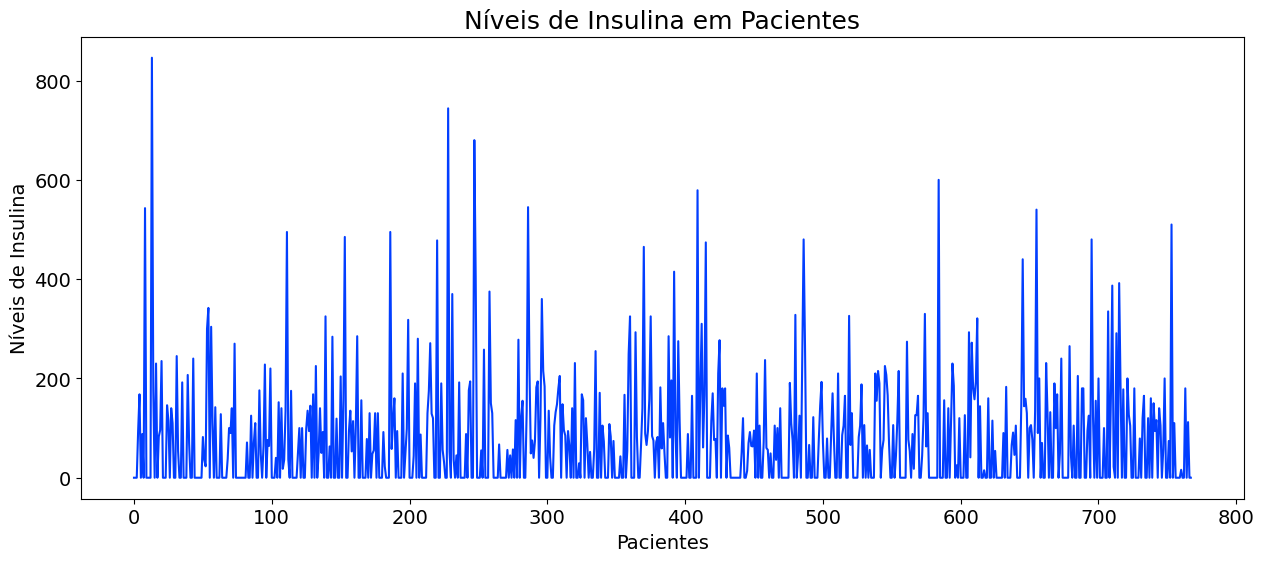

In [36]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title('Níveis de Insulina em Pacientes', fontsize = 18)
ax.set_ylabel('Níveis de Insulina', fontsize=14)
ax.set_xlabel('Pacientes', fontsize=14)
ax = dados['Insulin'].plot(fontsize=14)

<Axes: title={'center': 'Níveis de Insulina em Pacientes'}, ylabel='Níveis de Insulina'>

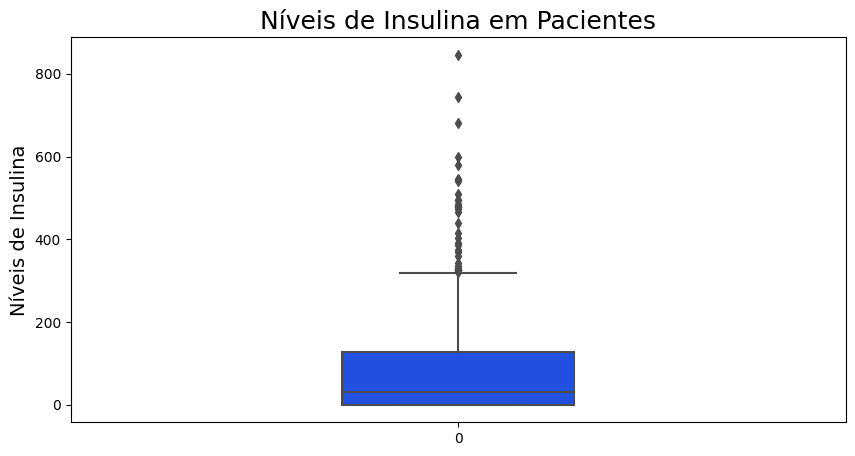

In [38]:
ax = sns.boxplot(data=dados['Insulin'], width=0.3)
ax.figure.set_size_inches(10, 5)
ax.set_title('Níveis de Insulina em Pacientes', fontsize = 18)
ax.set_ylabel('Níveis de Insulina', fontsize=14)
ax

In [52]:
y = dados['Outcome']

In [75]:
X = dados[['Glucose', 'BMI', 'Pregnancies']]

In [86]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=142)

In [87]:
print(
    X_treino.shape,
    X_teste.shape,
    y_treino.shape,
    y_teste.shape,
    (X_treino.shape[0] + X_teste.shape[0])
)

(537, 3) (231, 3) (537,) (231,) 768


Decision Tree Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [94]:
modelo_arvore = DecisionTreeClassifier(random_state=142)

In [95]:
modelo_arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=142)

In [96]:
y_pred = modelo_arvore.predict(X_teste)
acuracia = accuracy_score(y_teste, y_pred)
relatorio_classificacao = classification_report(y_teste, y_pred)

print(f'Acurácia do modelo: {acuracia}')
print(f'Relatório de classificação:\n{relatorio_classificacao}')

Acurácia do modelo: 0.7056277056277056
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       151
           1       0.57      0.64      0.60        80

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.71      0.71       231



KNeighborsClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [91]:
modelo_vizinhos = KNeighborsClassifier(n_neighbors=3)

In [92]:
modelo_vizinhos.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=3)

In [93]:
y_pred = modelo_vizinhos.predict(X_teste)
acuracia = accuracy_score(y_teste, y_pred)
relatorio_classificacao = classification_report(y_teste, y_pred)

print(f'Acurácia do modelo: {acuracia}')
print(f'Relatório de classificação:\n{relatorio_classificacao}')

Acurácia do modelo: 0.7445887445887446
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



Linear SVC

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [100]:
modelo_svc = LinearSVC(max_iter=10000,dual=False,random_state=142)

In [101]:
modelo_svc.fit(X_treino, y_treino)

LinearSVC(dual=False, max_iter=10000, random_state=142)

In [102]:
y_pred = modelo_svc.predict(X_teste)
acuracia = accuracy_score(y_teste, y_pred)
relatorio_classificacao = classification_report(y_teste, y_pred)

print(f'Acurácia do modelo: {acuracia}')
print(f'Relatório de classificação:\n{relatorio_classificacao}')

Acurácia do modelo: 0.8181818181818182
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       151
           1       0.78      0.66      0.72        80

    accuracy                           0.82       231
   macro avg       0.81      0.78      0.79       231
weighted avg       0.82      0.82      0.81       231

